# XGBoost Most Important Features

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

import matplotlib.pyplot as plt 
import seaborn as sns
import ppscore as pps

## Read in and Split Data

In [2]:
# read in data
data = pd.read_csv('../data/hospitalization_data.csv', dtype={'FIPS': object})
data.head()

,FIPS,Hospitalizations,Cases,State,County,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,...,% No College Degree,Unemployment Rate,% Not in Labor Force,% Jobs in Leisure and Hospitality,% Part-time,% Self-Employed,Hospitalization Rate,Case Rate,Presence of Water Violation (dummy Y/N),Other Primary Care Provider Ratio (:1)
0,12041,80,1588,Florida,Gilchrist,8968.375038,21.126757,4.763684,4.847069,7.669173,...,9.381368,3.4,52.053416,7.608085,52.605415,13.496566,438.2,8698.5,0,1521
1,12107,566,6374,Florida,Putnam,12710.036010,24.952601,5.359802,4.937745,10.439560,...,7.827534,4.3,55.123245,10.481016,52.040792,10.449204,763.2,8594.6,1,1766
2,12123,97,2710,Florida,Taylor,10593.946360,23.831961,4.855759,4.745002,9.772588,...,5.633540,3.6,54.561016,9.412498,60.553383,6.022409,448.6,12533.0,1,1201
3,12091,729,20298,Florida,Okaloosa,8033.687940,15.266246,3.889858,3.875538,7.872828,...,19.608361,2.7,40.581558,17.700785,39.062417,11.659616,351.7,9793.1,0,836
4,12013,59,1686,Florida,Calhoun,10649.098250,24.278851,4.887984,4.772105,8.024691,...,7.022045,4.1,58.913803,8.432470,56.585692,11.858775,404.5,11558.2,0,1621


In [3]:
X = data.drop(["FIPS", "Hospitalizations", "Cases", "Hospitalization Rate", "State", "County"], axis=1)
y = pd.DataFrame(data["Hospitalization Rate"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
len(X.columns)

97

## XGBoost

In [6]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [7]:
"""
Hyperparameter Tuning from 
https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
"""

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
    'eval_metric':"rmse"
}

In [8]:
num_boost_round = 999

In [9]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:404.14514
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:315.80188
[2]	Test-rmse:256.54675
[3]	Test-rmse:217.94147
[4]	Test-rmse:202.57091
[5]	Test-rmse:192.48392
[6]	Test-rmse:188.05171
[7]	Test-rmse:186.72241
[8]	Test-rmse:184.74034
[9]	Test-rmse:185.66382
[10]	Test-rmse:185.68102
[11]	Test-rmse:186.29678
[12]	Test-rmse:186.65500
[13]	Test-rmse:186.22386
[14]	Test-rmse:185.54813
[15]	Test-rmse:185.51570
[16]	Test-rmse:184.71233
[17]	Test-rmse:184.69641
[18]	Test-rmse:184.18634
[19]	Test-rmse:184.36877
[20]	Test-rmse:184.24973
[21]	Test-rmse:184.33585
[22]	Test-rmse:184.30658
[23]	Test-rmse:184.35693
[24]	Test-rmse:184.40646
[25]	Test-rmse:184.69070
[26]	Test-rmse:184.69841
[27]	Test-rmse:184.59328
[28]	Test-rmse:184.39706
Stopping. Best iteration:
[18]	Test-rmse:184.18634



In [10]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,396.764441,9.717357,406.702423,53.008126
1,294.717383,7.960634,319.644141,56.445176
2,221.656696,6.110055,263.997006,54.816181
3,168.646759,4.989584,230.256177,50.520545
4,130.034966,3.910325,210.103174,49.386122
5,101.868916,3.456329,198.705344,44.764847
6,81.638638,3.039273,192.705628,42.873532
7,66.604429,2.768025,189.112182,41.184731
8,54.882399,2.966388,186.559332,38.820232
9,46.345345,3.113279,186.306876,37.613757


In [11]:
cv_results['test-rmse-mean'].min()

185.43027959999998

### Tune max_depth and min_child_weight

In [12]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [13]:
# Define initial best params and rmse
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best rmse
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\trmse {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, rmse: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5
	rmse 187.343518 for 11 rounds
CV with max_depth=9, min_child_weight=6
	rmse 186.9495086 for 10 rounds
CV with max_depth=9, min_child_weight=7
	rmse 189.5910766 for 11 rounds
CV with max_depth=10, min_child_weight=5
	rmse 186.71149580000002 for 10 rounds
CV with max_depth=10, min_child_weight=6
	rmse 182.6402434 for 11 rounds
CV with max_depth=10, min_child_weight=7
	rmse 191.1117126 for 25 rounds
CV with max_depth=11, min_child_weight=5
	rmse 184.9354216 for 18 rounds
CV with max_depth=11, min_child_weight=6
	rmse 185.4368928 for 12 rounds
CV with max_depth=11, min_child_weight=7
	rmse 191.849051 for 10 rounds
Best params: 10, 6, rmse: 182.6402434


In [14]:
params['max_depth'] = 10
params['min_child_weight'] = 6

### Tune subsample and colsample

In [15]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [16]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\trmse {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, rmse: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	rmse 182.6402434 for 11 rounds
CV with subsample=1.0, colsample=0.9
	rmse 186.457544 for 10 rounds
CV with subsample=1.0, colsample=0.8
	rmse 190.53807060000003 for 12 rounds
CV with subsample=1.0, colsample=0.7
	rmse 186.3605166 for 18 rounds
CV with subsample=0.9, colsample=1.0
	rmse 193.9719422 for 14 rounds
CV with subsample=0.9, colsample=0.9
	rmse 190.3208192 for 13 rounds
CV with subsample=0.9, colsample=0.8
	rmse 191.2161804 for 10 rounds
CV with subsample=0.9, colsample=0.7
	rmse 192.2777982 for 11 rounds
CV with subsample=0.8, colsample=1.0
	rmse 188.3880706 for 11 rounds
CV with subsample=0.8, colsample=0.9
	rmse 189.5637238 for 11 rounds
CV with subsample=0.8, colsample=0.8
	rmse 195.19616399999998 for 10 rounds
CV with subsample=0.8, colsample=0.7
	rmse 196.9005036 for 20 rounds
CV with subsample=0.7, colsample=1.0
	rmse 195.298468 for 20 rounds
CV with subsample=0.7, colsample=0.9
	rmse 197.2885772 for 9 rounds
CV with subsample=0.7, 

In [17]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

### Tune eta

In [18]:
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['rmse'], early_stopping_rounds=10)
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\trmse {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, rmse: {}".format(best_params, min_rmse))

CV with eta=0.3
	rmse 182.6402434 for 11 rounds

CV with eta=0.2
	rmse 181.8213074 for 18 rounds

CV with eta=0.1
	rmse 183.9255218 for 44 rounds

CV with eta=0.05
	rmse 180.2275698 for 81 rounds

CV with eta=0.01
	rmse 182.4594698 for 409 rounds

CV with eta=0.005
	rmse 181.90362240000002 for 815 rounds

Best params: 0.05, rmse: 180.2275698


In [19]:
params['eta'] = .05

In [20]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:525.80402
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:502.84653
[2]	Test-rmse:482.07797
[3]	Test-rmse:462.12845
[4]	Test-rmse:443.97693
[5]	Test-rmse:425.86453
[6]	Test-rmse:409.21179
[7]	Test-rmse:393.85342
[8]	Test-rmse:379.31317
[9]	Test-rmse:366.58139
[10]	Test-rmse:354.38300
[11]	Test-rmse:342.27103
[12]	Test-rmse:331.34531
[13]	Test-rmse:321.34244
[14]	Test-rmse:311.26471
[15]	Test-rmse:301.69016
[16]	Test-rmse:293.57779
[17]	Test-rmse:285.09732
[18]	Test-rmse:277.45926
[19]	Test-rmse:270.02606
[20]	Test-rmse:263.00226
[21]	Test-rmse:256.37524
[22]	Test-rmse:250.56789
[23]	Test-rmse:245.33255
[24]	Test-rmse:240.25708
[25]	Test-rmse:235.53651
[26]	Test-rmse:231.41678
[27]	Test-rmse:227.05009
[28]	Test-rmse:222.40213
[29]	Test-rmse:219.34670
[30]	Test-rmse:216.60005
[31]	Test-rmse:213.77951
[32]	Test-rmse:211.08023
[33]	Test-rmse:208.38818
[34]	Test-rmse:205.34050
[35]	Test-rmse:203.48141
[36]	Test-rmse:201.17131
[37]	Test-rmse:199.41290
[38

In [21]:
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 186.21 in 72 rounds


### Get and save best model

In [22]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:525.80402
[1]	Test-rmse:502.84653
[2]	Test-rmse:482.07797
[3]	Test-rmse:462.12845
[4]	Test-rmse:443.97693
[5]	Test-rmse:425.86453
[6]	Test-rmse:409.21179
[7]	Test-rmse:393.85342
[8]	Test-rmse:379.31317
[9]	Test-rmse:366.58139
[10]	Test-rmse:354.38300
[11]	Test-rmse:342.27103
[12]	Test-rmse:331.34531
[13]	Test-rmse:321.34244
[14]	Test-rmse:311.26471
[15]	Test-rmse:301.69019
[16]	Test-rmse:293.57776
[17]	Test-rmse:285.09732
[18]	Test-rmse:277.45926
[19]	Test-rmse:270.02606
[20]	Test-rmse:263.00226
[21]	Test-rmse:256.37521
[22]	Test-rmse:250.56789
[23]	Test-rmse:245.33255
[24]	Test-rmse:240.25708
[25]	Test-rmse:235.53651
[26]	Test-rmse:231.41678
[27]	Test-rmse:227.05009
[28]	Test-rmse:222.40213
[29]	Test-rmse:219.34670
[30]	Test-rmse:216.60004
[31]	Test-rmse:213.77951
[32]	Test-rmse:211.08023
[33]	Test-rmse:208.38818
[34]	Test-rmse:205.34050
[35]	Test-rmse:203.48141
[36]	Test-rmse:201.17131
[37]	Test-rmse:199.41290
[38]	Test-rmse:197.84348
[39]	Test-rmse:195.86284
[40]	Test-

In [23]:
best_model.save_model("xgb.model")

In [24]:
(mean_squared_error(best_model.predict(dtest), y_test))**.5

186.2096204905004

## Feature Importance

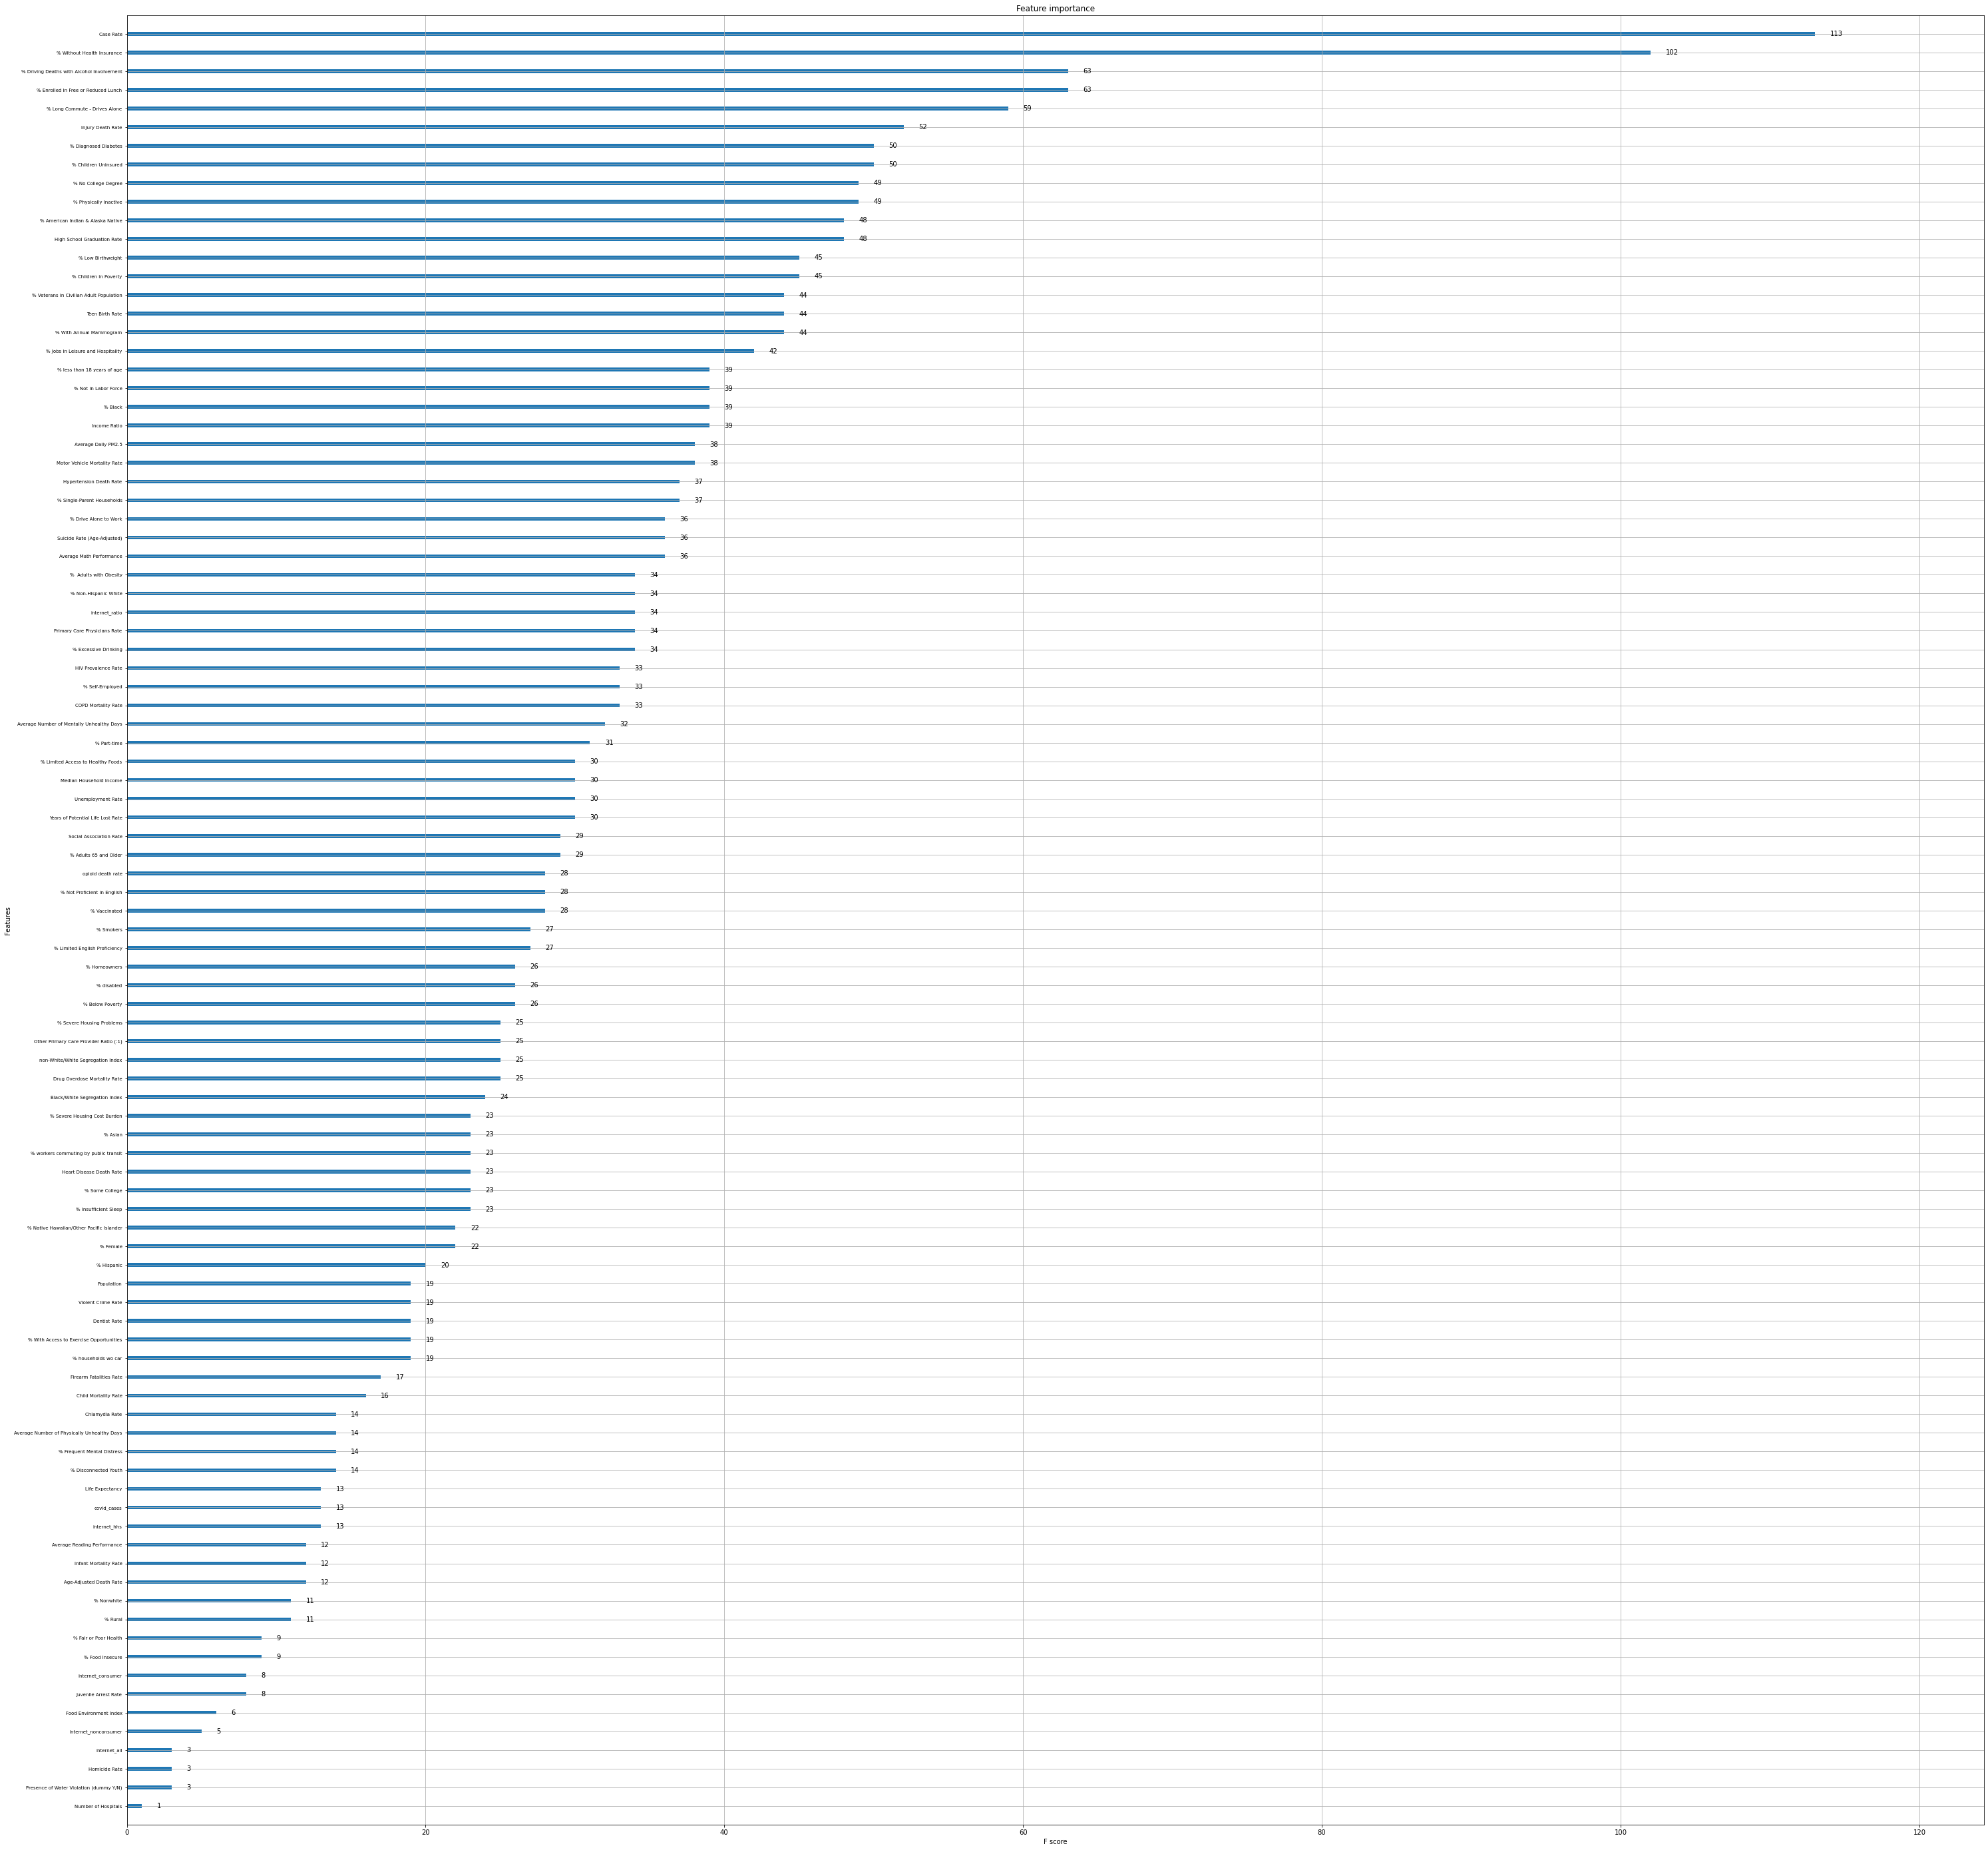

In [26]:
xgb.plot_importance(best_model)
plt.rcParams['figure.figsize'] = [50, 50]
plt.yticks(size = 7)
plt.show()

The following are the 8 most important features (F-Score > 380):
1. Case Rate
2. % Without Health Insurance
3. % Driving Deaths with Alcohol Involvement
4. % Enrolled in Free or Reduced Lunch
5. % Long Commute - Drives Alone
6. Injury Death Rate
7. % Diagnosed Diabetes
8. % Children Uninsured

## Correlation

In [27]:
X_x = X.filter(['Case Rate', '% Without Health Insurance',
                '% Enrolled in Free or Reduced Lunch', '% Driving Deaths with Alcohol Involvement',
                '% Long Commute - Drives Alone', 'Injury Death Rate',
                '% Diagnosed Diabetes', '% Children Uninsured'])

In [28]:
Correlation_Matrix=X_x.corr().abs()
Correlation_Matrix

,Case Rate,% Without Health Insurance,% Enrolled in Free or Reduced Lunch,% Driving Deaths with Alcohol Involvement,% Long Commute - Drives Alone,Injury Death Rate,% Diagnosed Diabetes,% Children Uninsured
Case Rate,1.000000,0.133891,0.413555,0.021917,0.173668,0.178036,0.000015,0.283967
% Without Health Insurance,0.133891,1.000000,0.458768,0.212171,0.078563,0.101227,0.325088,0.735862
% Enrolled in Free or Reduced Lunch,0.413555,0.458768,1.000000,0.109693,0.115305,0.086321,0.215307,0.469327
% Driving Deaths with Alcohol Involvement,0.021917,0.212171,0.109693,1.000000,0.093785,0.087946,0.107030,0.028932
% Long Commute - Drives Alone,0.173668,0.078563,0.115305,0.093785,1.000000,0.014395,0.005450,0.116363
Injury Death Rate,0.178036,0.101227,0.086321,0.087946,0.014395,1.000000,0.095178,0.021874
% Diagnosed Diabetes,0.000015,0.325088,0.215307,0.107030,0.005450,0.095178,1.000000,0.061951
% Children Uninsured,0.283967,0.735862,0.469327,0.028932,0.116363,0.021874,0.061951,1.000000


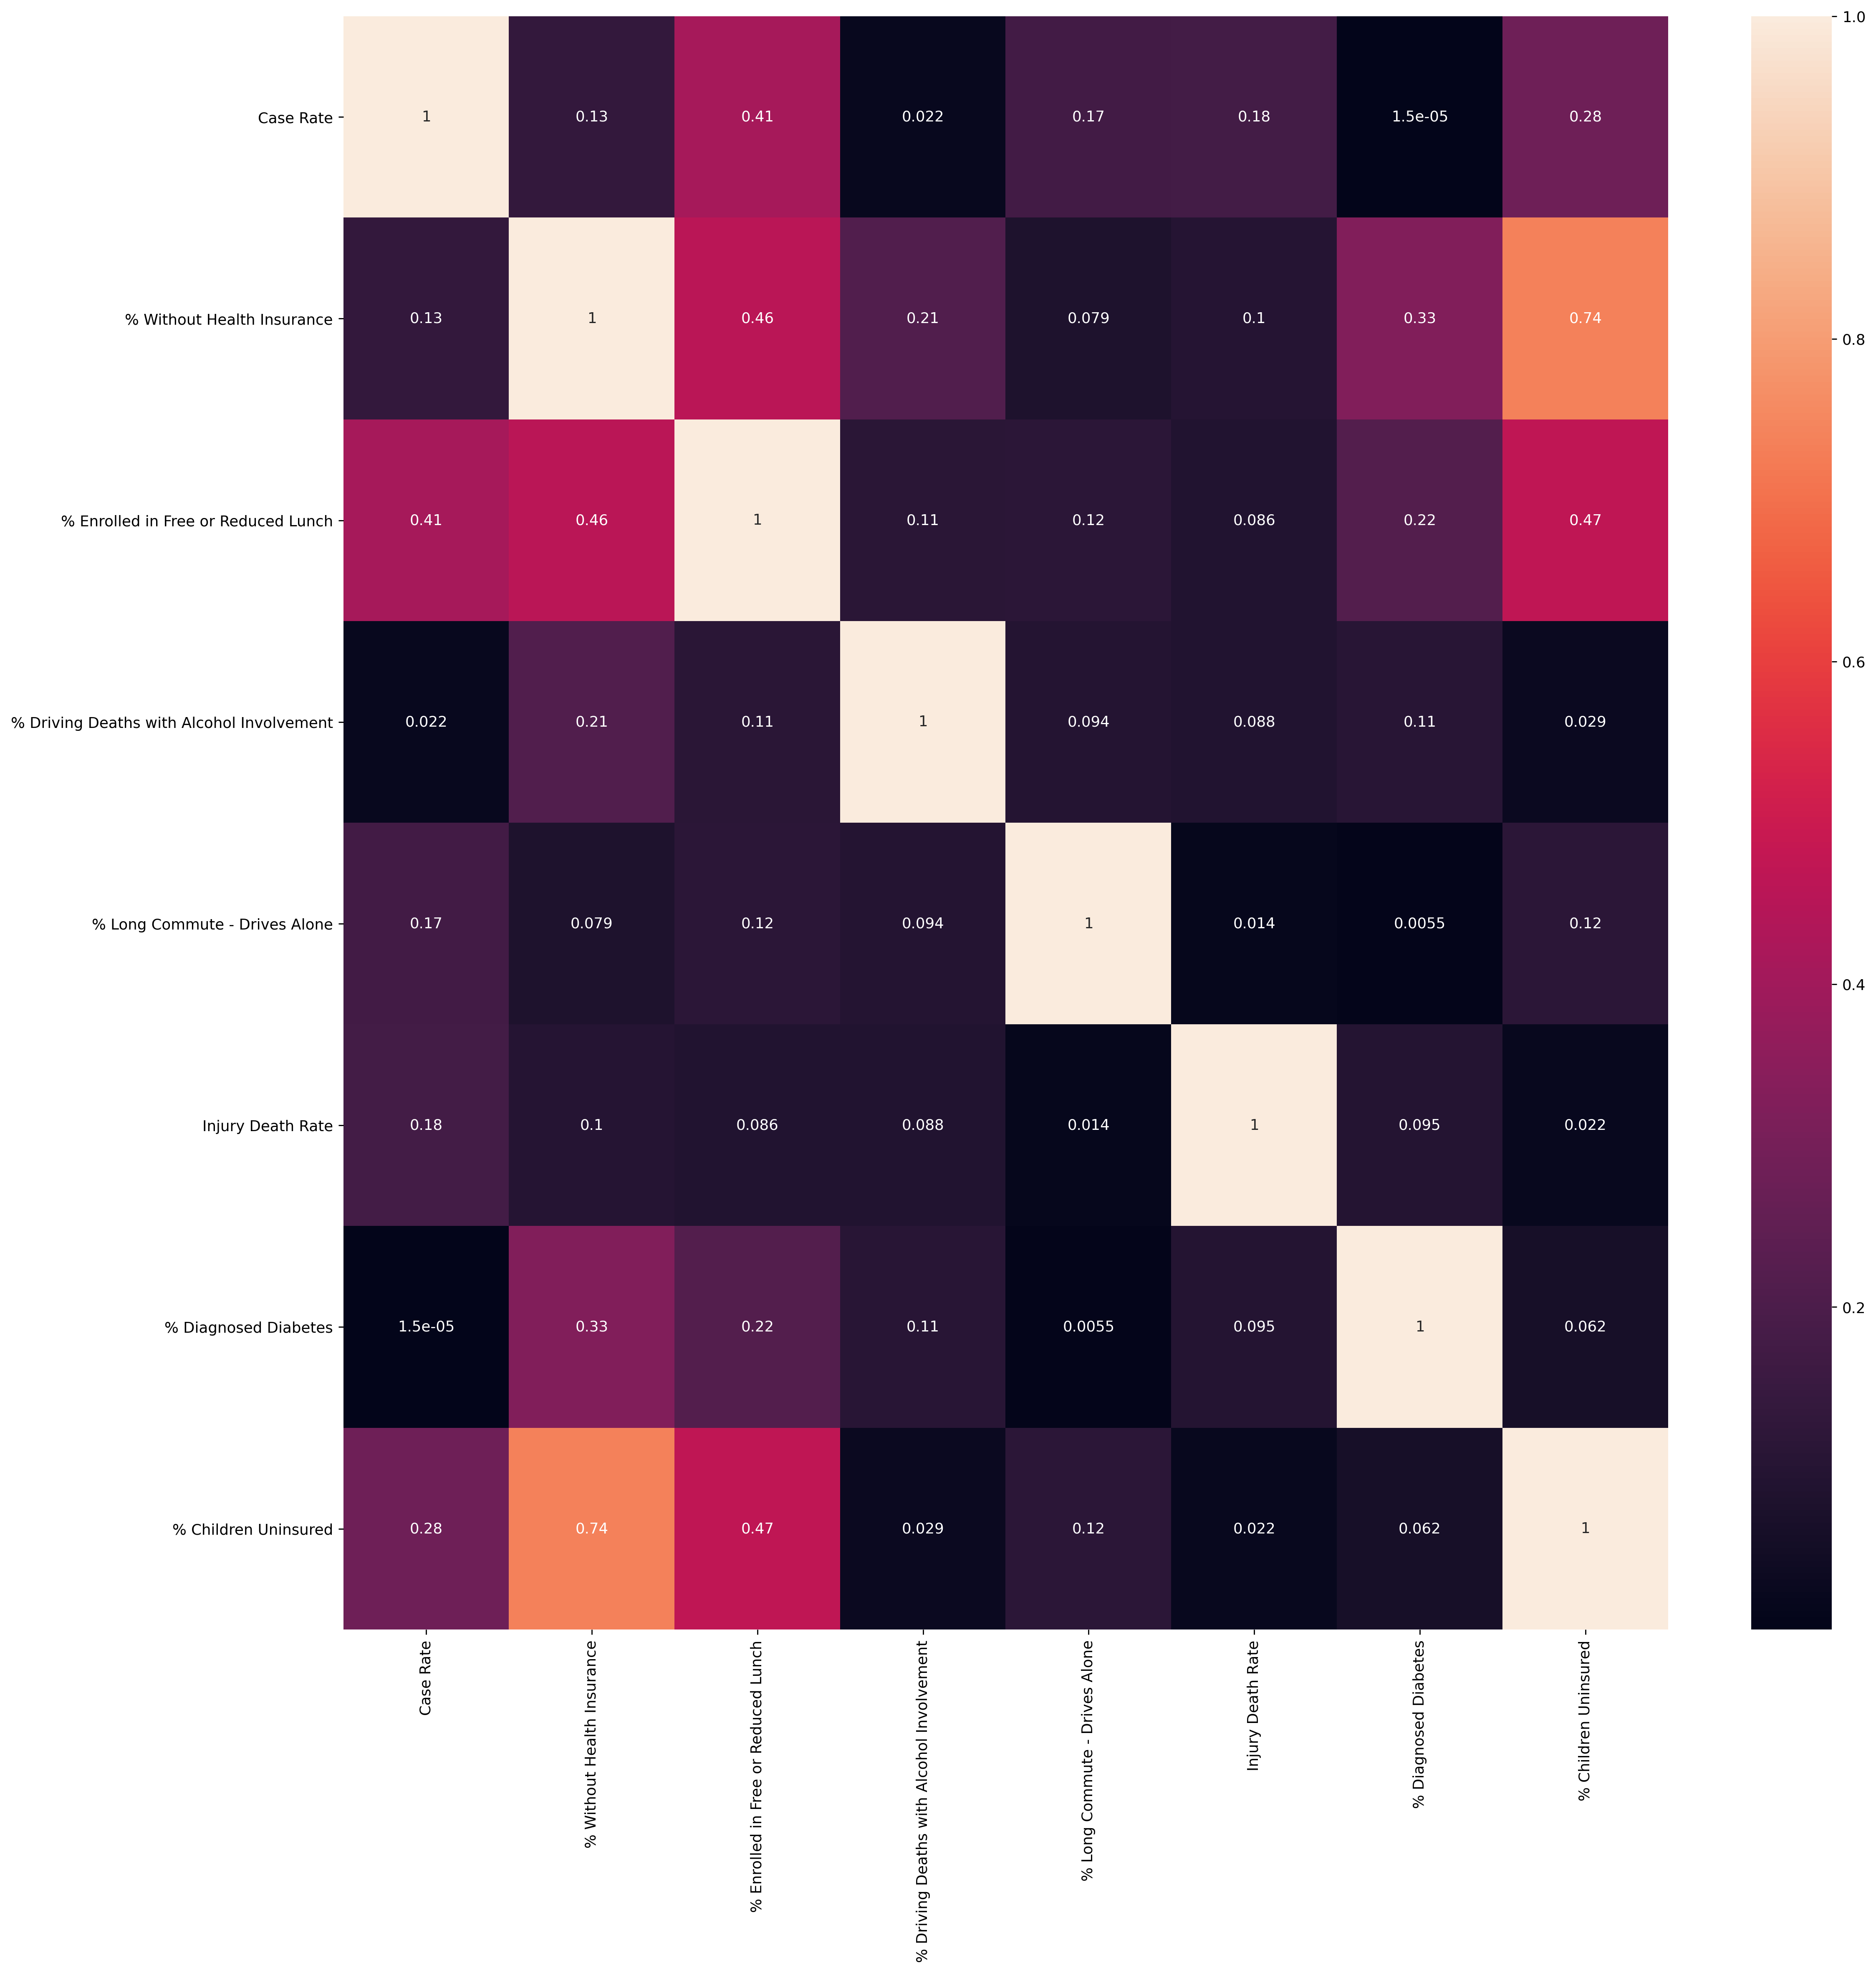

In [29]:
plt.figure(figsize=[20,20],dpi=256)
sns.heatmap(Correlation_Matrix, annot=True)

plt.show()

In [30]:
plt.figure(figsize=[20,20],dpi=400)
a = pps.matrix(X_x).pivot(columns='x', index='y', values='ppscore')
sns.heatmap(a, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()